In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch import nn, optim

%matplotlib inline 

## Loading FashionMNIST dataset

In [2]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

## Iterate and visualize the dataset

In [3]:
# Create a dictionary for labelset
labelmap = {
    0: "T-shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat", 
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag", 
    9: "Ankle boot",
}

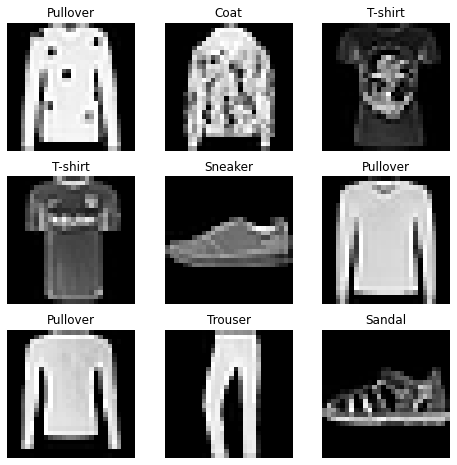

In [4]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(training_data), size= (1,)).item()
    training_img, training_lbl = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labelmap[training_lbl])
    plt.axis('off')
    plt.imshow(training_img.squeeze(), cmap='gray')
plt.show()

# Creating a custom dataset

In [5]:
import pandas as pd
from torchvision.io import read_image

In [6]:
class customdataset(Dataset):
    def __init__(self, img_dir, annotations_file, img_transform=None, tgt_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.img_transform = img_transform
        self.tgt.transform = tgt_transform
        
    def __len__(self):
        return len(self.img_labels)
        
    def __getitem__(self, idx):
        img_path = os.path.join(img_dir, self.img_labels.iloc[idx, 0])
        ip_img = read_csv(img_path)
        tgt_lbl = self.img_labels.iloc[idx, 1]
        if img_transform:
            ip_img = self.img_transform(ip_img)
        if self.tgt_transform:
            target = self.tgt_transform(tgt_lbl)
        return ip_img, target
        

## Dataloaders to iterate over the dataset

In [7]:
train_dl = DataLoader(training_data, batch_size=64, shuffle=True)
test_dl = DataLoader(test_data, batch_size=64, shuffle=False)

### Display some samples

Size of training batch torch.Size([64, 1, 28, 28])
Size of test batch torch.Size([64])


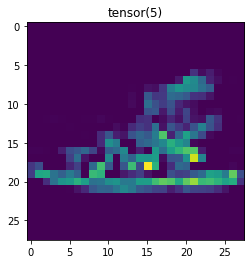

In [8]:
train_imgs, train_tgts = next(iter(train_dl))
print("Size of training batch {}".format(train_imgs.size()))
print("Size of test batch {}".format(train_tgts.size()))
img = train_imgs[0].squeeze()
lbl = train_tgts[0]
plt.imshow(img)
plt.title(lbl)
plt.show()

# Define model architechture

In [33]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )
        
    def forward(self, X):
        X = self.flatten(X)
        X = self.linear_relu_stack(X)
        return X

In [34]:
img_class_model = NeuralNetwork()

# Train and Validate model

In [35]:
# define model hyper parameters
num_epochs = 10
learning_rate = 1e-4
batch_size = 64

In [36]:
# define optimization and loss
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(img_class_model.parameters(), lr=learning_rate)

In [47]:
def train(dataloader, img_class_model, loss_fn, optimizer):
    size = len(train_dl.dataset)
    print("Size of dataset", size)
    for batch, (X, y) in enumerate(dataloader):
        # reset gradients for every epoch
        optimizer.zero_grad()
        
        # compute prediction and loss respectively
        pred = img_class_model(X)
        loss = loss_fn(pred, y)
        
        # backpropagate loss and update weights
        loss.backward()
        optimizer.step()
        
        if batch%100 == 0:
            loss = loss.item()
            current = batch*len(X)
            print(f"loss: {loss:>5f} [{current:>5d}/{size:>5d}]")
    
def test(dataloader, img_class_model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, current_acc = 0, 0
    
    with torch.no_grad():
        for X, y in dataloader:
            pred = img_class_model(X)
            test_loss = loss_fn(pred, y).item()
            current_acc += (pred.argmax(1) == y).type(torch.float).sum().item()
        
    test_loss /= num_batches
    current_acc /= size
    print(f"Test Error: \n Accuracy: {(100*current_acc):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [48]:
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}\n...................")
    train(train_dl, img_class_model, loss_fn, optimizer)
    test(test_dl, img_class_model, loss_fn)
print("Done!")

Epoch 1
...................
Size of dataset 60000
loss: 2.250966 [    0/60000]
loss: 2.259242 [ 6400/60000]
loss: 2.259505 [12800/60000]
loss: 2.246929 [19200/60000]
loss: 2.247298 [25600/60000]
loss: 2.250703 [32000/60000]
loss: 2.255847 [38400/60000]
loss: 2.235985 [44800/60000]
loss: 2.247018 [51200/60000]
loss: 2.236262 [57600/60000]
Test Error: 
 Accuracy: 23.8%, Avg loss: 0.014487 

Epoch 2
...................
Size of dataset 60000
loss: 2.254313 [    0/60000]
loss: 2.249129 [ 6400/60000]
loss: 2.234882 [12800/60000]
loss: 2.240003 [19200/60000]
loss: 2.235216 [25600/60000]
loss: 2.252574 [32000/60000]
loss: 2.243616 [38400/60000]
loss: 2.245604 [44800/60000]
loss: 2.246610 [51200/60000]
loss: 2.232586 [57600/60000]
Test Error: 
 Accuracy: 28.7%, Avg loss: 0.014416 

Epoch 3
...................
Size of dataset 60000
loss: 2.234846 [    0/60000]
loss: 2.222067 [ 6400/60000]
loss: 2.222775 [12800/60000]
loss: 2.219747 [19200/60000]
loss: 2.230285 [25600/60000]
loss: 2.230148 [32000

In [52]:
print(len(test_dl))

157
